## Data Exploration and Feature Selection



The experiment began with initial data exploration where we checked the distribution of target variable, the distribution of this target variable across different features in the data set. By doing this we aim to do dimensionality reduction in order to increase predictive power. We also aim at removing features that represent information already presented in another variable.

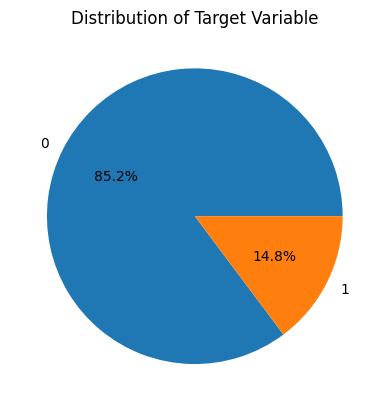

In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')

df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()


The data set is highly imbalanced

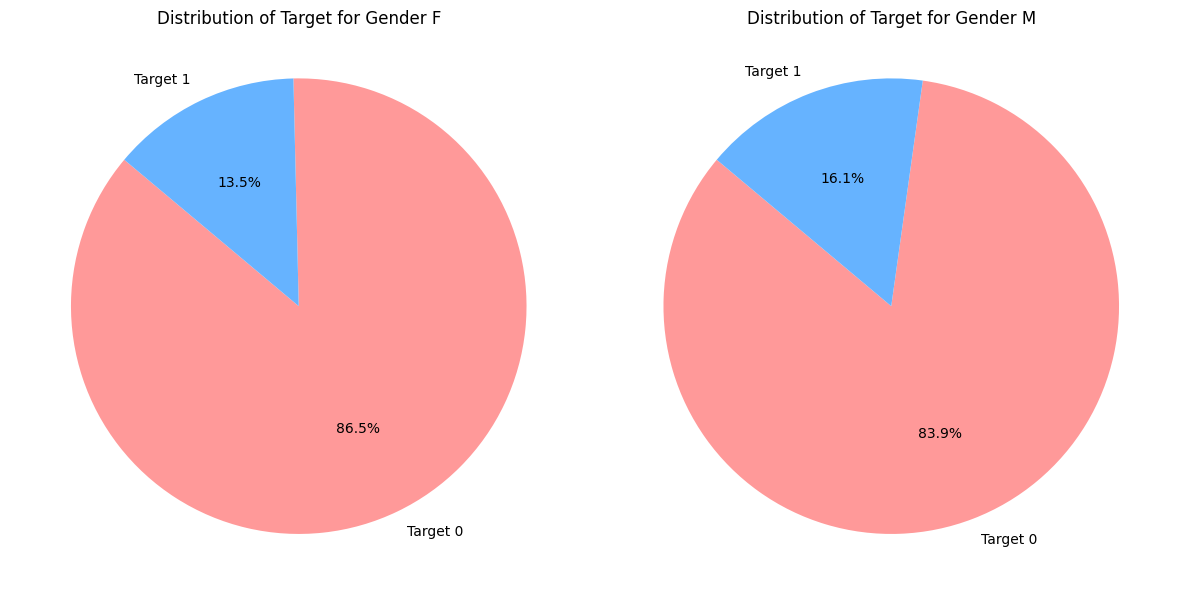

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='Gender', columns='target', aggfunc='size', fill_value=0)

# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting pie charts for each gender
for ax, gender in zip(axes, pivot_table.index):
    counts = pivot_table.loc[gender]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Gender {gender}')
    ax.axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()

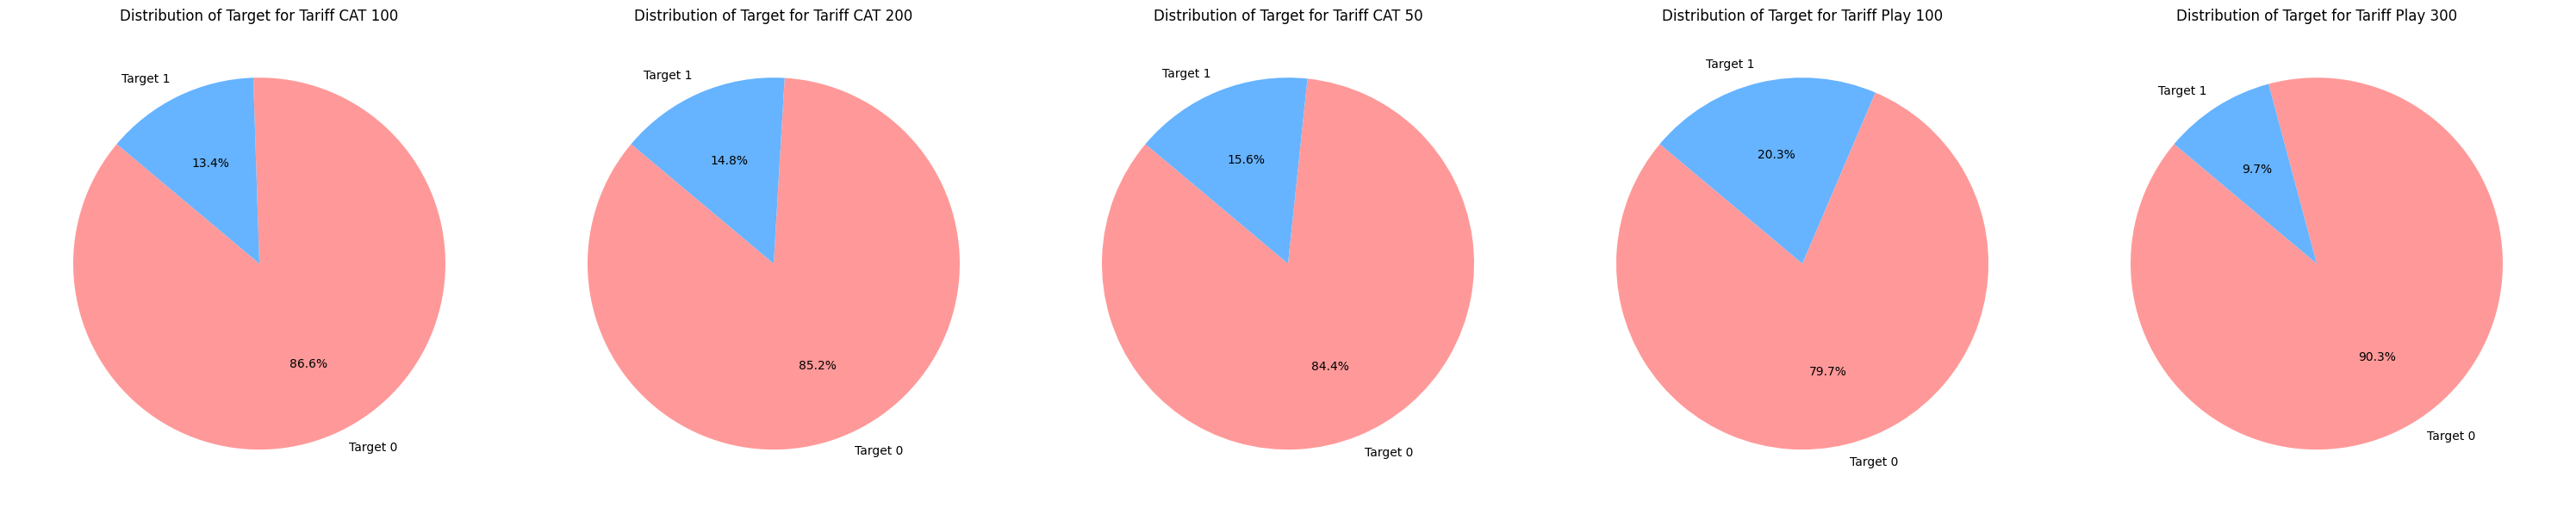

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='tariff', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique tariff values
num_tariffs = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_tariffs, figsize=(num_tariffs * 6, 6))

# Plotting pie charts for each tariff
for ax, tariff in zip(axes, pivot_table.index):
    counts = pivot_table.loc[tariff]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Tariff {tariff}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()

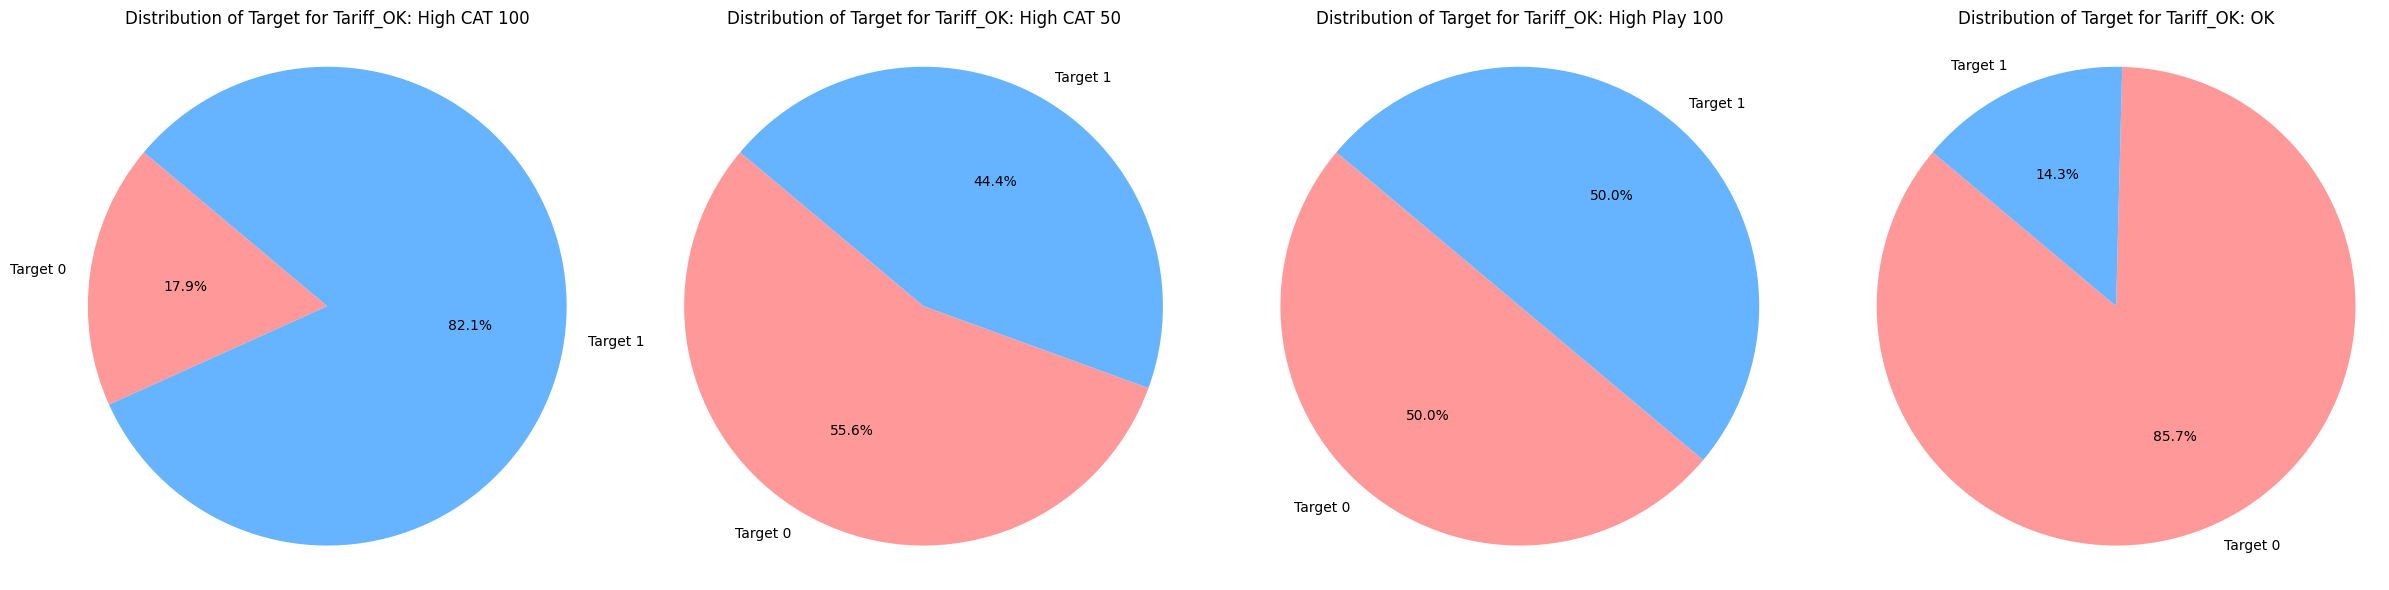

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='Tariff_OK', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique Tariff_OK values
num_categories = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 6, 6))

# Plotting pie charts for each category of Tariff_OK
for ax, category in zip(axes, pivot_table.index):
    counts = pivot_table.loc[category]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Tariff_OK: {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


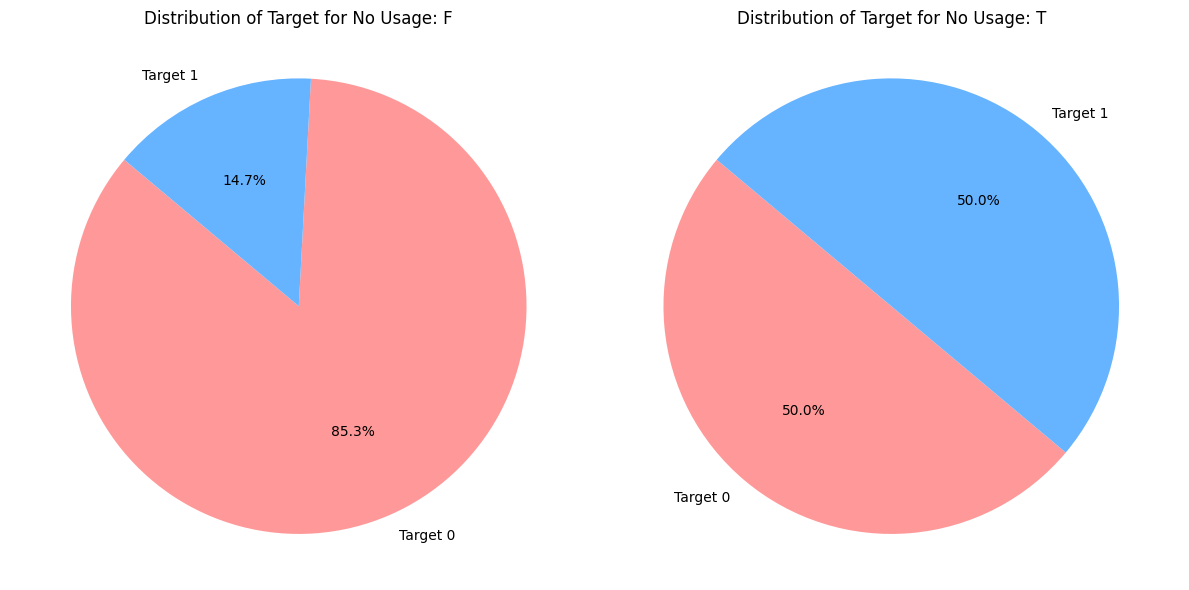

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='No Usage', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique No Usage values
num_categories = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 6, 6))

# Plotting pie charts for each category of No Usage
for ax, category in zip(axes, pivot_table.index):
    counts = pivot_table.loc[category]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for No Usage: {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


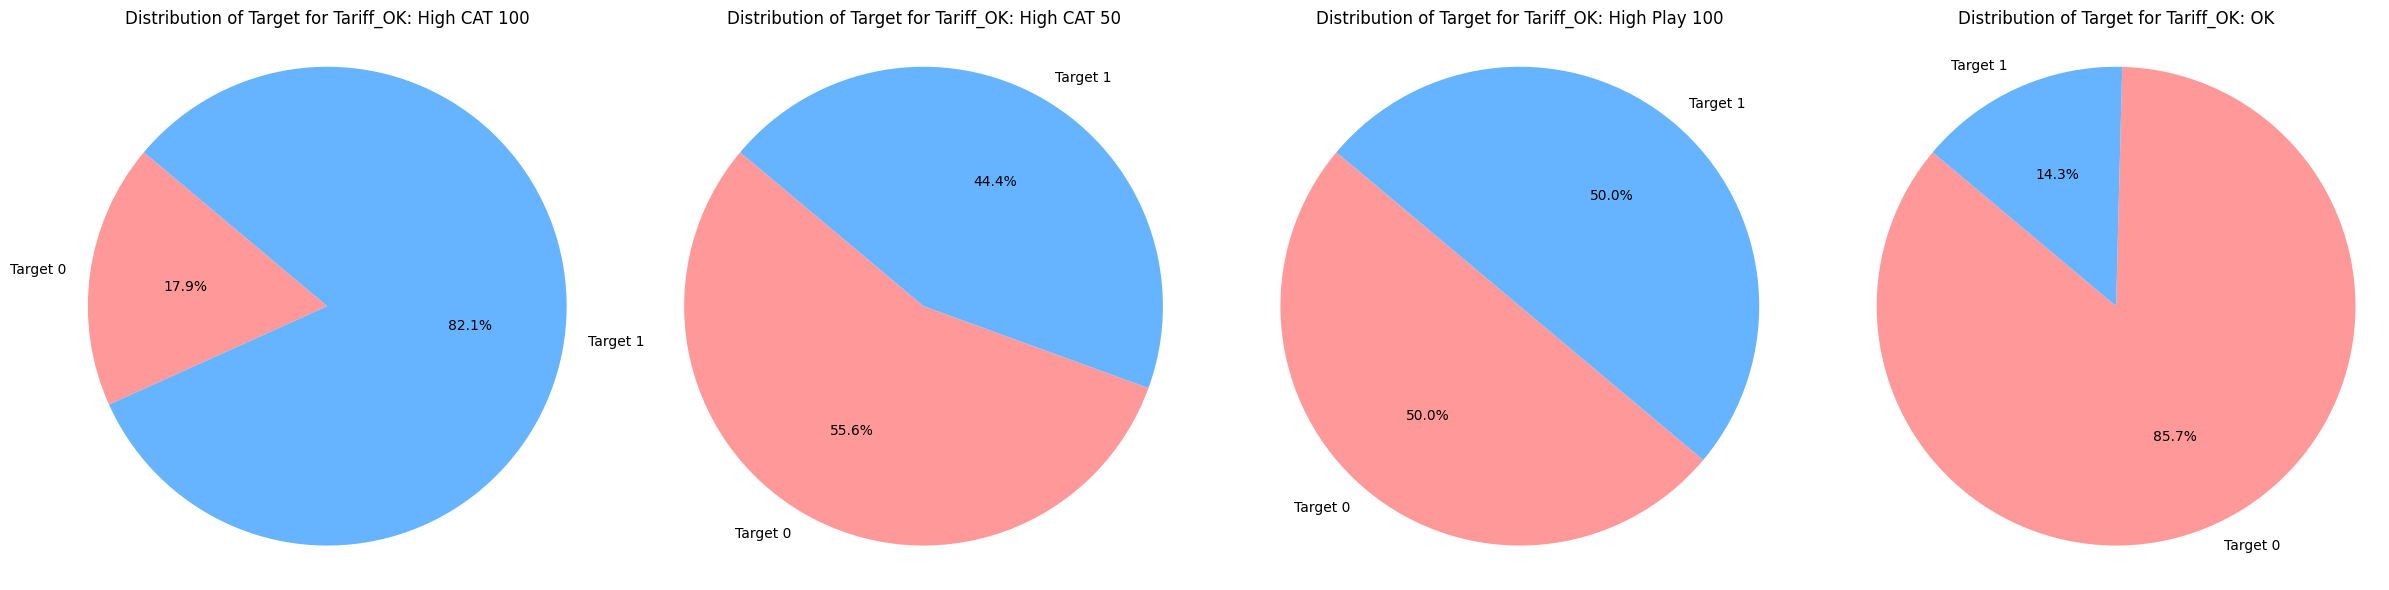

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='Tariff_OK', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique Tariff_OK values
num_categories = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 6, 6))

# Plotting pie charts for each category of Tariff_OK
for ax, category in zip(axes, pivot_table.index):
    counts = pivot_table.loc[category]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Tariff_OK: {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


The percentage of churners and non churners in Males and Females are the same, hence including this variable wont contribute to increasing predictive power, so we will remove it. Connection Date is better respresented in L_O_S hence we will remove it as well. Moreover, **peak_calls_sum, OffPeak_calls_Sum, Weekend_calls_sum** are reflected in more detail in the columns mentioning the mins for these calls. The column ID has no meaning when training, so we will remove these and convert the remaining categorical variable to nominal using dummy variables.


## Preprocessing and fitting Random Forest



In [ ]:

import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv('train.csv')
#Perform one-hot encoding
df = pd.get_dummies(df, columns=['tariff'])
df = pd.get_dummies(df, columns=['Usage_Band'])
df = pd.get_dummies(df, columns=['Handset'])

#Removing columns
df.drop('Connect_Date', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('high Dropped calls', axis=1, inplace=True)
df.drop('Peak_calls_Sum', axis=1, inplace=True)
df.drop('OffPeak_calls_Sum', axis=1, inplace=True)
df.drop('Weekend_calls_Sum', axis=1, inplace=True)
df.drop('No Usage', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('Tariff_OK', axis=1, inplace = True)
print(df)

#Removing the missing values
df_cleaned = df.dropna()
print(df_cleaned)


#Fitting a Random Forest algorithm on the data
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score , f1_score
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

#Performing SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define a custom scoring function for AUC
def custom_auc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred[:, 1])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42, bootstrap=True)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with custom scoring function for AUC
grid_search = GridSearchCV(rf_model, param_grid, scoring=custom_auc, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_resampled, y_resampled)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict probabilities on the test set
y_probs = best_rf_model.predict_proba(X_test)

# Calculate AUC on the test set
auc = roc_auc_score(y_test, y_probs[:, 1])
print("AUC on test set:", auc)

predictions = pd.DataFrame({'target_probability': y_probs[:, 1], 'average_cost_min': X_test['average cost min']})

# Sort the predictions based on the highest probability of churn predicted
top_20_predictions = predictions.sort_values(by='target_probability', ascending=False).head(20)

# Print top 20 predictions
print(top_20_predictions)


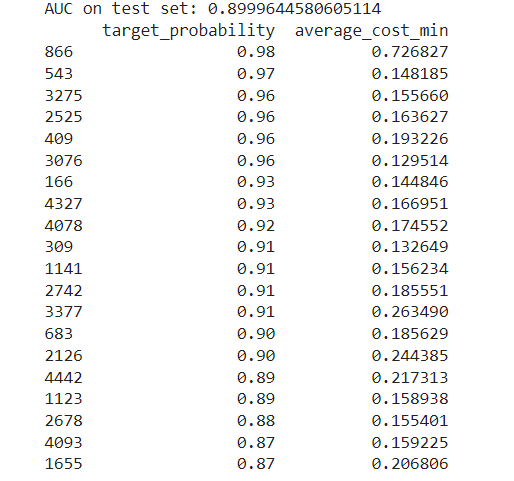

In [ ]:
print(top_20_predictions)
# Calculate the sum of 'average_cost_min' for the top 20 predictions
total_average_cost_min = top_20_predictions['average_cost_min'].sum()

# Print the sum
print("Sum of average_cost_min for top 20 predictions:", total_average_cost_min)

      target_probability  average_cost_min
3377                0.98          0.263490
3275                0.94          0.155660
866                 0.94          0.726827
1631                0.91          0.185262
543                 0.91          0.148185
4327                0.91          0.166951
4338                0.90          0.148001
409                 0.90          0.193226
4078                0.90          0.174552
1758                0.89          0.184247
4554                0.88          0.348823
3076                0.88          0.129514
586                 0.87          0.169780
2685                0.87          0.137304
2126                0.87          0.244385
2742                0.87          0.185551
2997                0.86          0.140684
4093                0.86          0.159225
2507                0.86          0.163320
4182                0.86          0.149697
Sum of average_cost_min for top 20 predictions: 4.174684


## Importing, Processing, and Cleaning Test Data


In [ ]:
import pandas as pd

# Load the dataset
df_t = pd.read_csv('test.csv')

#Perform one-hot encoding
df_t = pd.get_dummies(df_t, columns=['tariff'])
df_t = pd.get_dummies(df_t, columns=['Usage_Band'])
df_t = pd.get_dummies(df_t, columns=['Handset'])

#Removing the columns
df_t.drop('high Dropped calls', axis=1, inplace=True)
df_t.drop('Connect_Date', axis=1, inplace=True)
df_t.drop('Peak_calls_Sum', axis=1, inplace=True)
df_t.drop('OffPeak_calls_Sum', axis=1, inplace=True)
df_t.drop('Weekend_calls_Sum', axis=1, inplace=True)
df_t.drop('No Usage', axis=1, inplace=True)
df_t.drop('Gender', axis=1, inplace=True)
df_t.drop('Tariff_OK', axis=1, inplace=True)

#Storing the id column and removing
id = df_t['id']
df_t.drop('id', axis=1, inplace=True)

print(df_t)

df_t_cleaned = df_t
print(df_t_cleaned)

df_t_cleaned.to_csv('testt_cleaned.csv', index=False)




In [ ]:
df_imputed = df_t_cleaned.fillna(df.median())

## Predicting on Test Set


In [ ]:
import pandas as pd

# Use the trained Random Forest model to make predictions on the test dataset
predictions = best_rf_model.predict(df_imputed)

# You can then use the predictions for further analysis or evaluation
print(predictions)

# Create a DataFrame to show predictions along with other characteristics
predictions_df = pd.DataFrame({'target': predictions})

# Concatenate the original characteristics of the test_cleaned dataset with the predictions
resultt_df = pd.concat([df_t_cleaned, predictions_df], axis=1)

# Concatenate the 'id' column from test_cleaned with the predictions
resultt_df['id'] = id

# Display the DataFrame
print(resultt_df)

final_df = resultt_df.loc[:, ['id', 'target']]
final_df.rename(columns={'id': 'ID', 'target': 'PRED'}, inplace=True)
final_df.dropna(inplace=True)

print(final_df)

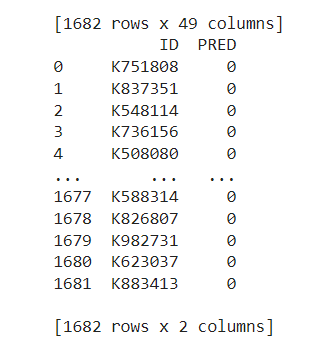

When using blackbox models such as Random Forest that cannot be intuitively deciphered in their ouput, using interpretability techniques on the processed models is advised to have some understanding and trust in the model's predictions. There are several techniques that are mainstays of within machine learning techniques, including: Feature importance, Partial dependence plots, individual conditional expectiations plots, LIME, Shapley values (or SHAP).

A simple, most straighforward in application is the permutation importance, which does not require the model's retraining and is model 'agnostic'. With this techniques, the features are randomely shuffled, or in other words permuted, to examine the effect on the model's performance. Becuase the features are shuffled, meaning their values are permuted, then the trained model does not change, which is helpful in terms of efficiency. Model agnosticism means that this technique can be applied to any type of model regardless of its type or internal structure. Below, we calculated the permutation importance scores for the features:

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Calculate permutation importance
permutation_result = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

# Extract importance scores
importances = pd.Series(permutation_result.importances_mean, index=X_test.columns).sort_values(ascending=False)

# Print the importance scores
print("Permutation Importance:")
print(importances)




Permutation Importance:
Handset_CAS30             0.093849
Handset_ASAD90            0.059122
Dropped_Calls             0.011209
Age                       0.009400
Handset_S50               0.008392
Total_call_cost           0.007432
Handset_ASAD170           0.006192
AveOffPeak                0.006127
Total_Cost                0.005429
L_O_S                     0.005030
Nat_call_cost_Sum         0.002892
International_mins_Sum    0.002715
AveWeekend                0.002707
Handset_WC95              0.002648
Handset_BS110             0.002565
Handset_S80               0.002363
AveNational               0.002183
Nat-InterNat Ratio        0.001733
Peak_mins_Sum             0.001616
Usage_Band_Med            0.001600
Mins_charge               0.001374
Weekend_mins_Sum          0.001364
actual call cost          0.001282
OffPeak_mins_Sum          0.001200
Handset_BS210             0.001037
Peak ratio                0.000737
tariff_CAT 100            0.000644
tariff_CAT 50             0.000